In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import plotly.express as px
from scipy.integrate import solve_ivp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

task1

In [6]:
def new_system(t, state, a1=1.0, b1=0.5, a2=0.5, b2=1.0):
    x1, x2 = state
    dx1_dt = a1 * np.sin(x1 * x2) - b1 * x1
    dx2_dt = -a2 * x2**2 + b2 * np.cos(x1)
    return [dx1_dt, dx2_dt]

# Генерація 10,000 точок для нової системи
def generate_new_system_data():
    t_span = (0, 100)
    initial_state = [1.0, 1.0]
    t_eval = np.linspace(t_span[0], t_span[1], 10000)
    sol = solve_ivp(new_system, t_span, initial_state, t_eval=t_eval)
    return sol.t, sol.y.T

# Візуалізація даних
def visualize_data(data, title):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=range(len(data)), y=data[:, 0], label='x1')
    sns.lineplot(x=range(len(data)), y=data[:, 1], label='x2')
    plt.title(title)
    plt.xlabel('Time steps')
    plt.ylabel('Values')
    plt.legend()
    plt.show()


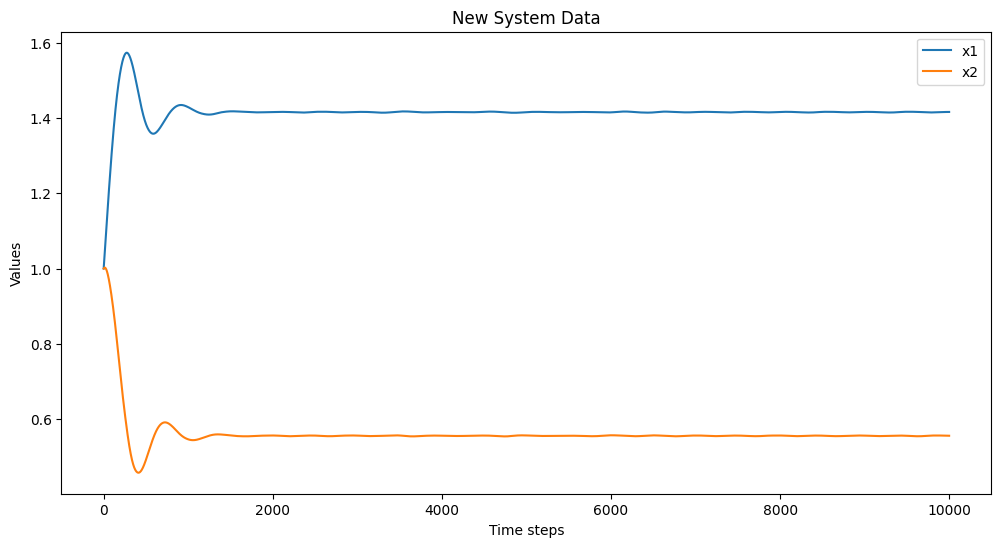


New System Model Evaluation:
Mean Squared Error: 0.0016441763160021067
R2 Score: 0.5109681253035085


In [7]:
def train_and_evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    print(f'R2 Score: {r2}')
    return model

# Основний код для виконання всіх завдань
# 1. Генерація та візуалізація даних для нової системи
t, new_system_data = generate_new_system_data()
visualize_data(new_system_data, 'New System Data')

# 2. Навчання моделей для прогнозування на основі отриманих даних
# Перетворимо дані для навчання моделей (наприклад, спробуємо передбачити x2 на основі x1)
X_new_system = new_system_data[:, :1]  # x1 як ознака
y_new_system = new_system_data[:, 1]   # x2 як ціль
print("\nNew System Model Evaluation:")
new_system_model = train_and_evaluate_model(X_new_system, y_new_system)

task 2

In [5]:
def prepare_data(data):
    # Розділення на ознаки (X) та цільові значення (y)
    X = data[:, :1]  # Використовуємо x1 як ознаку
    y = data[:, 1]   # Використовуємо x2 як ціль

    # Розділення на навчальний, валідаційний і тестовий набори
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Нормалізація даних за допомогою StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    return X_train, X_val, X_test, y_train, y_val, y_test

# Основний код для виконання всіх завдань
# Генерація даних для нової системи
t, new_system_data = generate_new_system_data()

# Підготовка даних
X_train, X_val, X_test, y_train, y_val, y_test = prepare_data(new_system_data)

# Перевірка розмірів даних
print("Train set size:", X_train.shape, y_train.shape)
print("Validation set size:", X_val.shape, y_val.shape)
print("Test set size:", X_test.shape, y_test.shape)


Train set size: (7000, 1) (7000,)
Validation set size: (1500, 1) (1500,)
Test set size: (1500, 1) (1500,)


task3

In [19]:
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

# Ініціалізація моделей
models_with_params = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Support Vector Machine": SVR(kernel='rbf')
}

# Навчання моделей
trained_models = {}
for model_name, model in models_with_params.items():
    print(f"{model_name} training completed.")

Linear Regression training completed.
Decision Tree training completed.
Random Forest training completed.
Support Vector Machine training completed.


task4

In [22]:
# Параметри для підбору
param_grids = {
    "Linear Regression": {
        'fit_intercept': [True, False],
    },
    "Decision Tree": {
        'max_depth': [10, 20],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [1, 2]
    },
    "Random Forest": {
        'n_estimators': [50, 100],
        'max_depth': [10, 20],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [1, 2]
    },
    "Support Vector Machine": {
        'C': [0.1, 1],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale']
    }
}

# Виконання Grid Search з меншим числом фолдів
def grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=3,  # зменшена кількість фолдів
        scoring='neg_mean_squared_error',
        n_jobs=2  # обмежуємо кількість процесорів
    )
    grid_search.fit(X_train, y_train)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score: {-grid_search.best_score_}")
    return grid_search.best_estimator_

# Виконання Grid Search для кожної моделі
best_models = {}
for model_name, model in models_with_params.items():
    print(f"\nTuning hyperparameters for {model_name}...")
    best_model = grid_search(model, param_grids[model_name], X_train, y_train)
    best_models[model_name] = best_model


Tuning hyperparameters for Linear Regression...
Best parameters: {'fit_intercept': True}
Best score: 0.001698746555391533

Tuning hyperparameters for Decision Tree...
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score: 0.001342979765404956

Tuning hyperparameters for Random Forest...
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best score: 0.0011825094933174427

Tuning hyperparameters for Support Vector Machine...
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best score: 0.0014103259386480072


task5

In [23]:
validation_results = {}
for model_name, model in best_models.items():
    # Прогнозування на валідаційному наборі
    y_val_pred = model.predict(X_val)

    # Обчислення MSE та R²
    mse_val = mean_squared_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)

    validation_results[model_name] = {
        "MSE": mse_val,
        "R²": r2_val
    }

    print(f"Model: {model_name} \nMean Squared Error (Validation): {mse_val} \nR² (Validation): {r2_val}\n")

# Оцінка моделей на тестовому наборі
test_results = {}
for model_name, model in best_models.items():
    # Прогнозування на тестовому наборі
    y_test_pred = model.predict(X_test)

    # Обчислення MSE та R²
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    test_results[model_name] = {
        "MSE": mse_test,
        "R²": r2_test
    }

    print(f"Model: {model_name} \nMean Squared Error (Test): {mse_test} \nR² (Test): {r2_test}\n")

Model: Linear Regression 
Mean Squared Error (Validation): 0.0018930470050830175 
R² (Validation): 0.43200278271204173

Model: Decision Tree 
Mean Squared Error (Validation): 0.0011416242392586658 
R² (Validation): 0.657462604284901

Model: Random Forest 
Mean Squared Error (Validation): 0.000876993713901322 
R² (Validation): 0.7368633807098003

Model: Support Vector Machine 
Mean Squared Error (Validation): 0.0010200752170337426 
R² (Validation): 0.693932647660713

Model: Linear Regression 
Mean Squared Error (Test): 0.0019563589113391886 
R² (Test): 0.4649784210438639

Model: Decision Tree 
Mean Squared Error (Test): 0.001078306982676428 
R² (Test): 0.7051065113220705

Model: Random Forest 
Mean Squared Error (Test): 0.0009001186609046543 
R² (Test): 0.7538371387715188

Model: Support Vector Machine 
Mean Squared Error (Test): 0.0010935044656638154 
R² (Test): 0.7009503305226562



task6

In [24]:
results = {
    "Model": [],
    "Validation MSE": [],
    "Validation R²": [],
    "Test MSE": [],
    "Test R²": []
}

# Додавання результатів для кожної моделі
for model_name in best_models.keys():
    results["Model"].append(model_name)
    results["Validation MSE"].append(validation_results[model_name]["MSE"])
    results["Validation R²"].append(validation_results[model_name]["R²"])
    results["Test MSE"].append(test_results[model_name]["MSE"])
    results["Test R²"].append(test_results[model_name]["R²"])

# Створення DataFrame
results_df = pd.DataFrame(results)

# Вивід таблиці
print(results_df)

                    Model  Validation MSE  Validation R²  Test MSE   Test R²
0       Linear Regression        0.001893       0.432003  0.001956  0.464978
1           Decision Tree        0.001142       0.657463  0.001078  0.705107
2           Random Forest        0.000877       0.736863  0.000900  0.753837
3  Support Vector Machine        0.001020       0.693933  0.001094  0.700950


Оцінка моделей
Оцінювання виконувалося за допомогою середньої квадратичної помилки (MSE) та коефіцієнта детермінації (R²) на валідаційному та тестовому наборах. Моделі, які показали найнижчий MSE та найвищий R², вважалися кращими.

---
| Model                   | Validation MSE | Validation R² | Test MSE | Test R² |
|------------------------|----------------|----------------|----------|---------|
| Linear Regression       | 0.001893       | 0.432003       | 0.001956 | 0.464978|
| Decision Tree           | 0.001142       | 0.657463       | 0.001078 | 0.705107|
| Random Forest           | 0.000877       | 0.736863       | 0.000900 | 0.753837|
| Support Vector Machine   | 0.001020       | 0.693933       | 0.001094 | 0.700950|



In [28]:
y_pred_lr = best_models["Linear Regression"].predict(X_val)
y_pred_dt = best_models["Decision Tree"].predict(X_val)
y_pred_rf = best_models["Random Forest"].predict(X_val)
y_pred_svm = best_models["Support Vector Machine"].predict(X_val)

y_validation = y_val

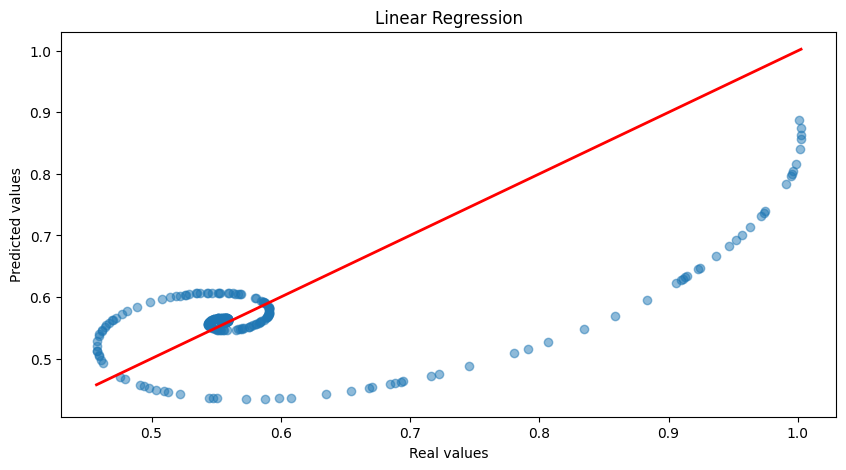

In [33]:
plt.figure(figsize=(10, 5))
plt.scatter(y_validation, y_pred_lr, alpha=0.5)
plt.plot([min(y_validation), max(y_validation)], [min(y_validation), max(y_validation)], color='red', linewidth=2)
plt.title('Linear Regression')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.show()

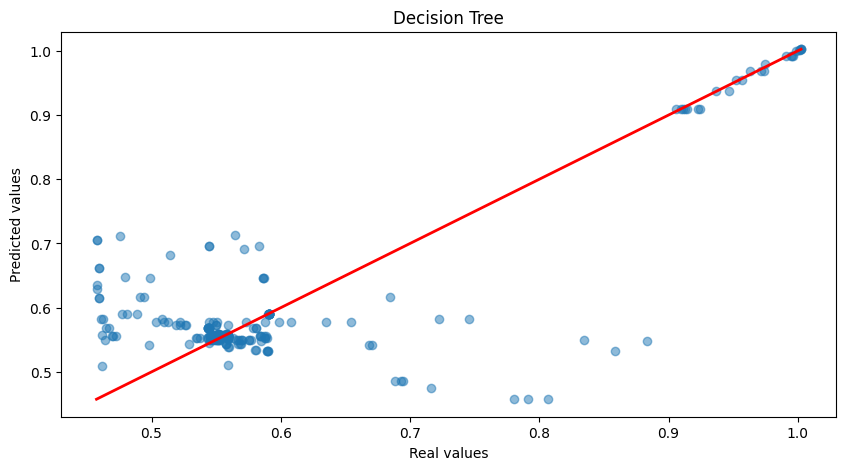

In [34]:
plt.figure(figsize=(10, 5))
plt.scatter(y_validation, y_pred_dt, alpha=0.5)
plt.plot([min(y_validation), max(y_validation)], [min(y_validation), max(y_validation)], color='red', linewidth=2)
plt.title('Decision Tree')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.show()

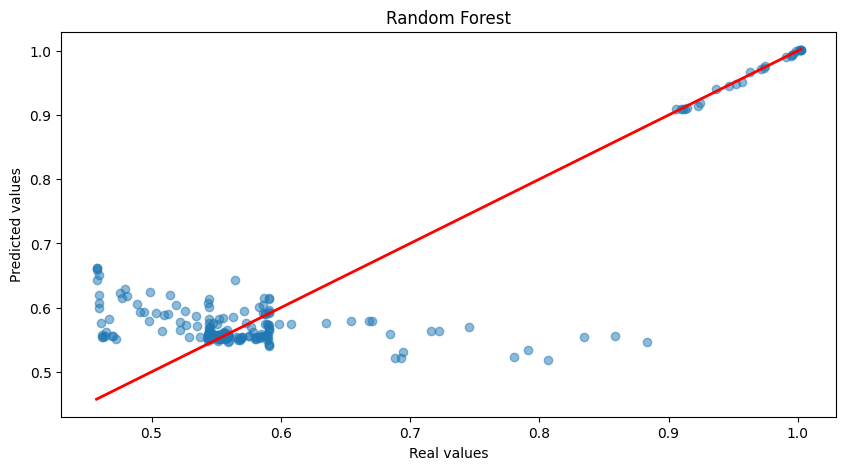

In [35]:
plt.figure(figsize=(10, 5))
plt.scatter(y_validation, y_pred_rf, alpha=0.5)
plt.plot([min(y_validation), max(y_validation)], [min(y_validation), max(y_validation)], color='red', linewidth=2)
plt.title('Random Forest')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.show()

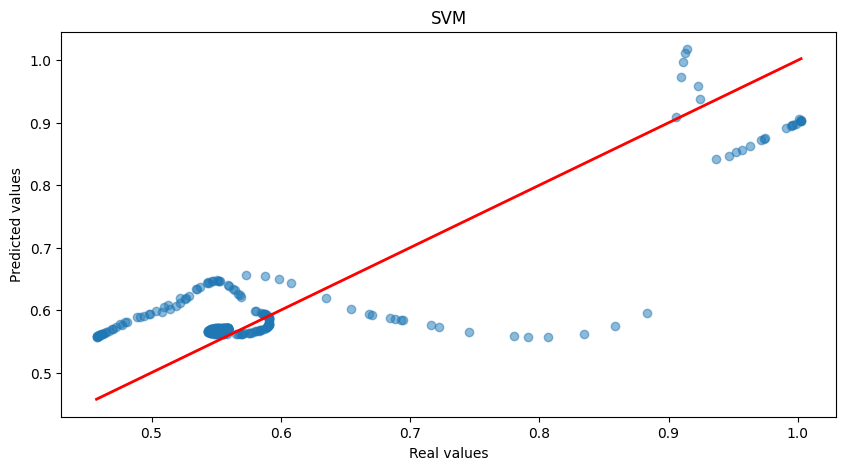

In [36]:
plt.figure(figsize=(10, 5))
plt.scatter(y_validation, y_pred_svm, alpha=0.5)
plt.plot([min(y_validation), max(y_validation)], [min(y_validation), max(y_validation)], color='red', linewidth=2)
plt.title('SVM')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.show()

**Висновки**

Найкраща модель: Случайний ліс показав найкращі результати з найнижчим MSE (0.000877) та найвищим R² (0.736863).
Переваги моделей: Дерево рішень і SVM також продемонстрували хороші результати